# DBSCAN(Densitiy Based Spatial Clustering of Applications with Noise)

## DBSCAN
- DBSCAN은 특정 공간 내에서 **데이터 밀도 차이**를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행합니다.
- DBSCAN은 알고리즘이 데이터 밀도 차이를 자동으로 감지하며 군집을 생성하므로 사용자가 군집 개수를 지정할 수 없습니다.
<br></br>
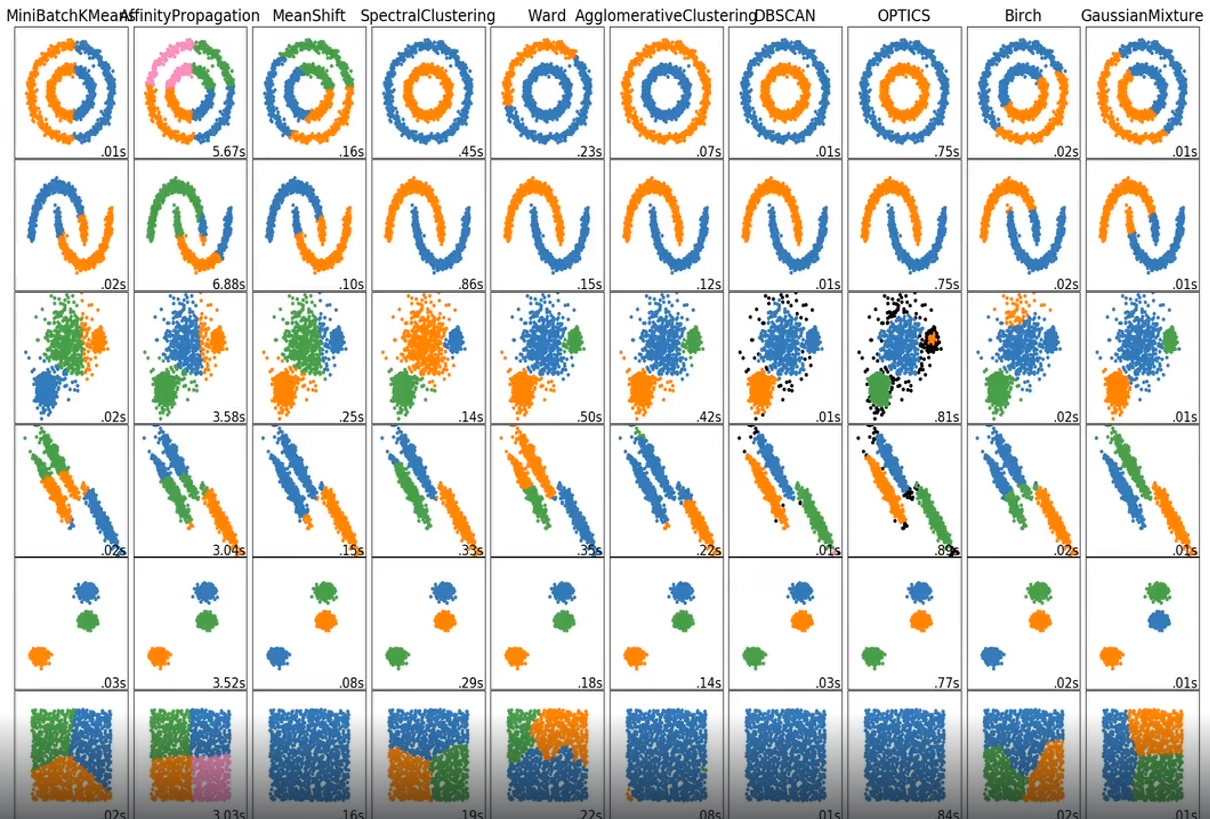
- DBSCAN은 데이터의 밀도가 자주 변하거나, 아예 모든 데이터의 밀도가 크게 변하지 않으면 군집화 성능이 떨어집니다.
- 피처의 개수가 많으면 군집화 성능이 떨어집니다.

## DBSCAN 구성 요소
#### DBSCAN을 이루는 파라미터
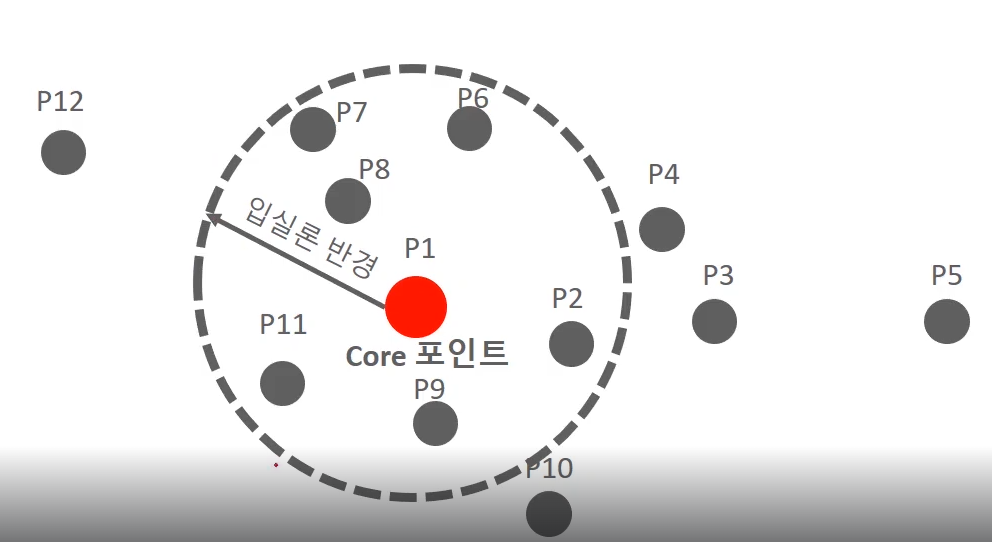
- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 최소 개수
    
#### DBSCAN을 이루는 다양한 포인트
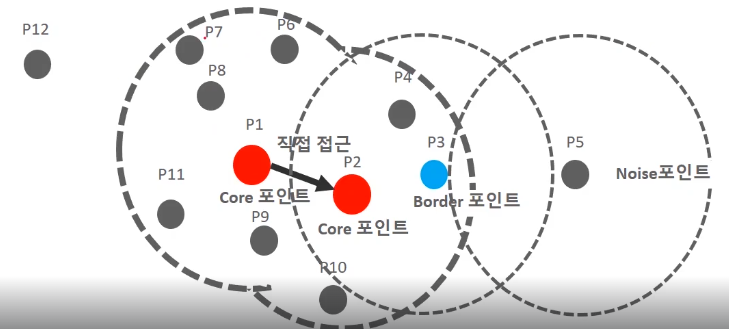
입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 **데이터 포인트**를 다음과 같이 정의합니다.
- 핵심 포인트(Core Point)
    - 주변 영역 내에 최소 데이터 개수(min points) 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 합니다.
- 이웃 포인트(Neighbor Point)
    - 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 합니다.
- 경계 포인트(Boarder Point)
    - 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 합니다.
- 잡음 포인트(Noise Point)
    - 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트, 이웃 포인트 조차 없는 데이터를 잡음 포인트라고 합니다.

## DBSCAN 절차
#### Step1
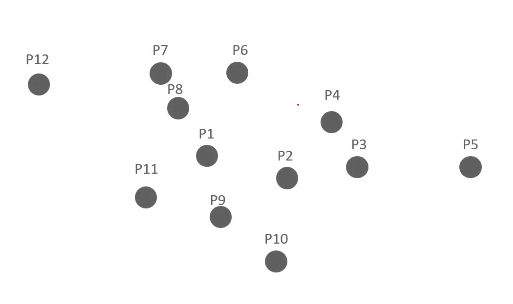
- 특정 입실론 반경내에 포함될 최소 데이터 세트를 6개로(자기 자신 데이터 포함) 가정합니다.

#### Step2
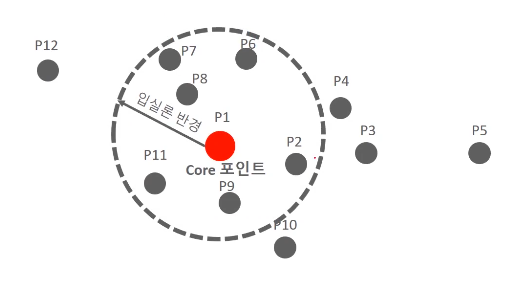
- P1 데이터를 기준으로 입살론 반경 내에 포함된 데이터가 7개로 최소 데이터 6개 이상을 만족해 P1은 핵심 포인트(Core Point)가 됩니다.

#### Step3
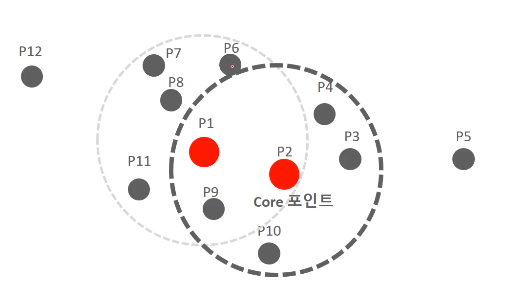
- 다음 데이터로 다양한 포인트를 살펴보며 그 중 P2가 입실론 반경 내에 자신포함 6개의 데이터를 가져 핵심포인트가 됩니다.

#### Step4
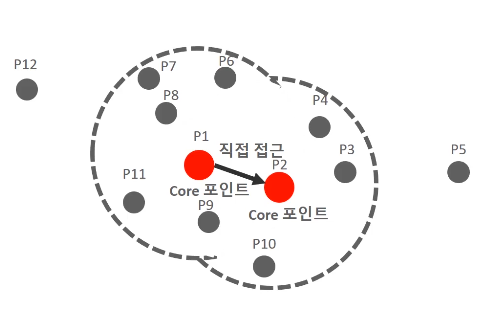
- 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군비화를 구성합니다. 이러한 방시긍로 군집(Clustering) 영역을 확장해 나가는 것이 DBSCAN 군집화 방식입니다.

#### Step5 
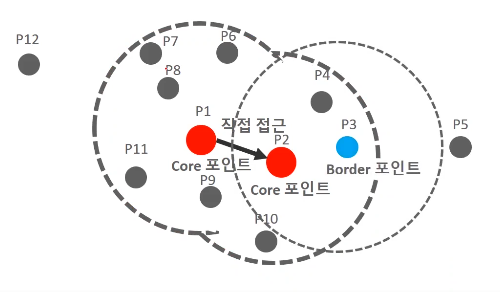
- P3의 경우 이웃데이터가 6개 미만으로 Core Point는 될 수 없지만 핵심포인트인 P2를 이웃데이터로 가지고 있어 경계 포인트(Boarder Point)가 됩니다. 경계 포인트는 군집의 외곽을 형성합니다.

#### Step6
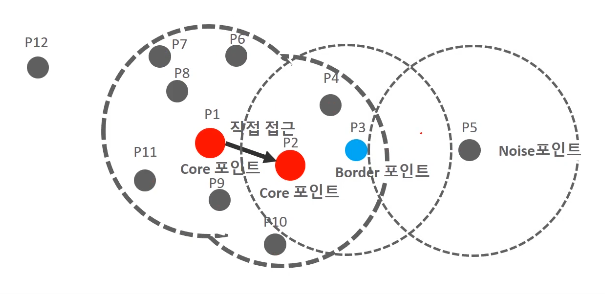
- P5와 같이 반경 내에 최소 데이터를 가지지 앟으며, 이웃데이터로 핵심포인트 또한 없는 데이터를 잡음 포인트(Noise Point)라고 합니다.

## 사이킷런 DBSCAN
- 사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원합니다. DBSCAN 클래스는 다음과 같은 주요한 초기화 파라미터를 가지고 있습니다.
    - eps : 입실론 주변 영역의 반경을 의미합니다.
    - min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미합니다.(자신의 데이터를 포함한 최소값을 입력합니다.)

# 실습


### DBSCAN 적용하기 – 붓꽃 데이터 셋

In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**eps 0.6 min_samples=8 로 DBSCAN 군집화 적용**

In [2]:
from sklearn.cluster import DBSCAN

# eps : 0~1까지, metric : 거리 측정방식
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

# dbscan_cluster가 -1인 경우 noise를 의미함
irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [3]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

**PCA 2개 컴포넌트로 기존 feature들을 차원 축소 후 시각화**

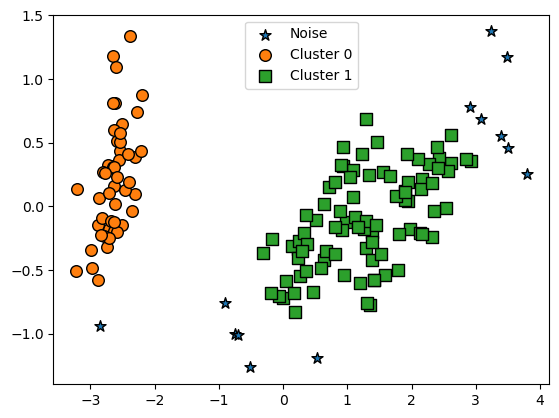

In [4]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**eps의 크기를 증가 한 후 노이즈 확인**

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


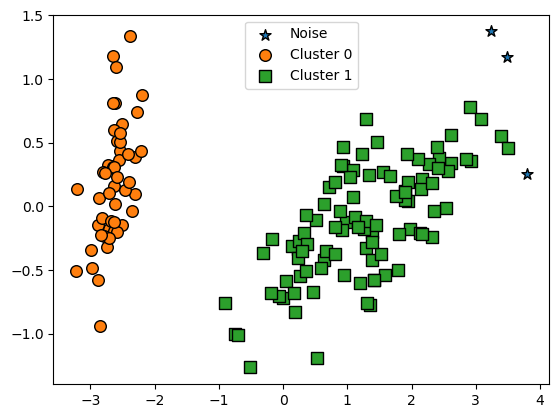

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


**min_samples의 크기를 증가 후 노이즈 확인**

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


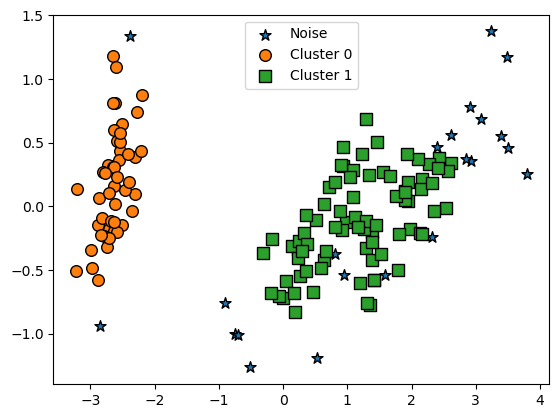

In [6]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 – make_circles() 데이터 세트

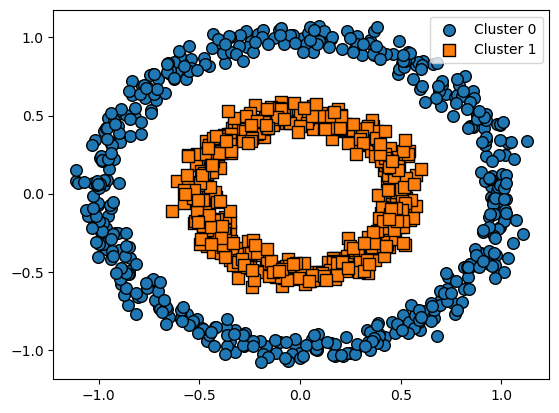

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


C:\Users\qotnd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


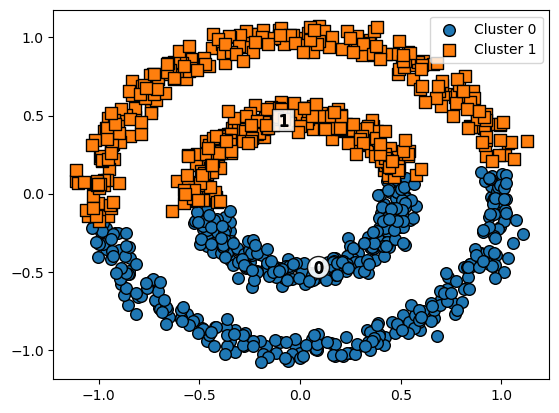

In [8]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


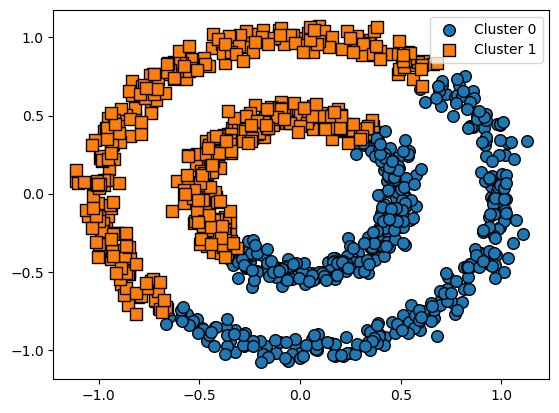

In [9]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


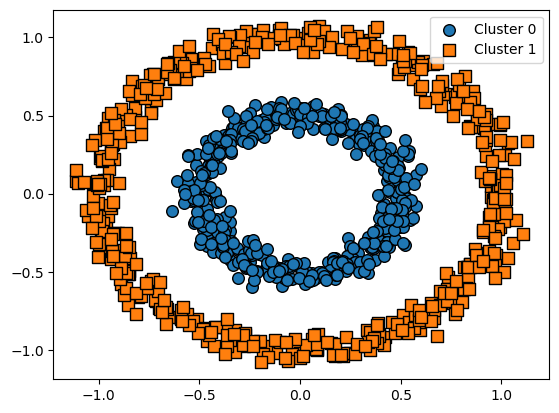

In [10]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
